# Project 3

## Weekend movie trip

#### Data is taken from https://grouplens.org/datasets/movielens/

#### The result of this project is a recommendation of a movie using K-means clustering and DBSCAN clustering

#### Loading ids dataset

In [1]:
import pandas as pd
import warnings
dataset_ids = pd.read_csv("../data/raw/links.csv")
dataset_ids.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#### Loading movies dataset

In [2]:
dataset_movies = pd.read_csv("../data/raw/movies.csv")
dataset_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
dataset_movies['genres'] = dataset_movies['genres'].str.split('|').values
dataset_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


#### Loading ratings dataset

In [4]:
dataset_ratings = pd.read_csv("../data/raw/ratings.csv")
dataset_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


#### Cleaning ratings dataset by retaining only movieID and rating column

In [5]:
dataset_ratings = dataset_ratings[['movieId', 'rating']]
dataset_ratings.head()

,movieId,rating
0,296,5.0
1,306,3.5
2,307,5.0
3,665,5.0
4,899,3.5


In [6]:
dataset_ratings = pd.DataFrame(dataset_ratings.groupby(['movieId']).mean()['rating'])
dataset_ratings.head()

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


In [7]:
dataset_ratings.reset_index(inplace=True)
dataset_ratings.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


#### Loading tags dataset

In [8]:
dataset_tags = pd.read_csv("../data/raw/tags.csv")
dataset_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


#### Cleaning tags dataset by retaining only movieID and tag column

In [9]:
dataset_tags = dataset_tags[[ 'movieId', 'tag']]
dataset_tags.drop_duplicates(inplace= True)
dataset_tags.head()

,movieId,tag
0,260,classic
1,260,sci-fi
2,1732,dark comedy
3,1732,great dialogue
4,7569,so bad it's good


In [10]:
dataset_tags.movieId.nunique()

45251

In [11]:
dataset_movies.shape

(62423, 3)

In [12]:
dataset_movies.head()


,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [13]:
dataset_ratings.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


#### Merging movie and rating datasets so that we can see the rating for the movie by processing the data

In [14]:
dataset_movieratings=pd.merge(dataset_movies,dataset_ratings,
                       how='right', on=['movieId'])
dataset_movieratings.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.893708
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",3.251527
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",3.142028
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",2.853547
4,5,Father of the Bride Part II (1995),[Comedy],3.058434


#### Below result shows the rating for each movie

In [15]:
movie_rating = dataset_movieratings.groupby(['title','rating']).count()
movie_rating

,,movieId,genres
title,rating,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1,1
"""Great Performances"" Cats (1998)",2.896648,1,1
#1 Cheerleader Camp (2010),2.111111,1,1
#Captured (2017),3.750000,1,1
#Female Pleasure (2018),3.666667,1,1
...,...,...,...
…And the Fifth Horseman Is Fear (1965),3.250000,1,1
キサラギ (2007),3.250000,1,1
チェブラーシカ (2010),3.166667,1,1


#### Below plot shows rating for each movie

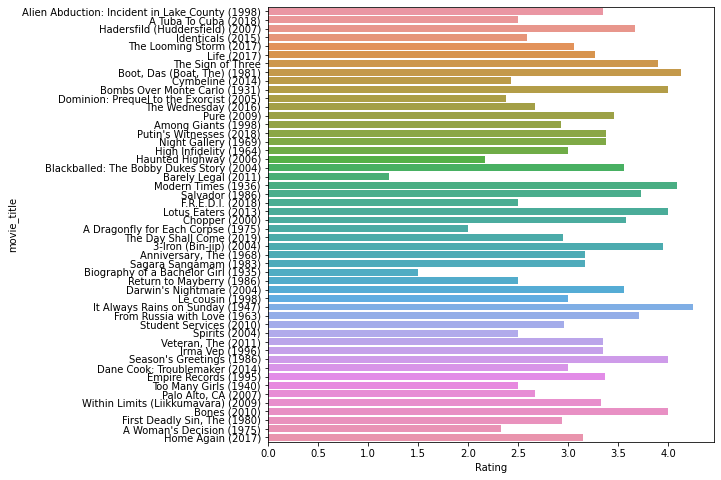

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
ax = sns.barplot(x='rating',y='title',data=dataset_movieratings.sample(50))
ax.set(xlabel='Rating', ylabel='movie_title')
plt.show()

In [17]:
dataset_movieratings.shape

(59047, 4)

In [18]:
dataset_movieratings.isnull().any()

movieId    False
title      False
genres     False
rating     False
dtype: bool

#### Merging tags dataset and the movie rating dataset (which I've merged using movies and ratings dataset)

In [19]:
dataset_movies_ratings_tags=pd.merge(dataset_movieratings,dataset_tags,
                       how='left', on=['movieId'])
dataset_movies_ratings_tags.shape
dataset_movies_ratings_tags.head()

,movieId,title,genres,rating,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.893708,Owned
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.893708,imdb top 250
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.893708,Pixar
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.893708,time travel
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.893708,children


#### Below result shows the number of tags for each movie

In [20]:
import numpy as np
numberoftags = dataset_movies_ratings_tags.groupby(['title'])['tag'].nunique().sort_values(ascending= False).to_frame()
numberoftags['title'] = numberoftags.index.tolist()
numberoftags.columns = ['Number of tags','title']
numberoftags.index= np.arange(0,len(numberoftags))
numberoftags.head()

,Number of tags,title
0,766,Star Wars: Episode IV - A New Hope (1977)
1,550,Forrest Gump (1994)
2,517,Pulp Fiction (1994)
3,405,"Shawshank Redemption, The (1994)"
4,292,"Matrix, The (1999)"


#### Below plot show the graph for number of tags for each movie

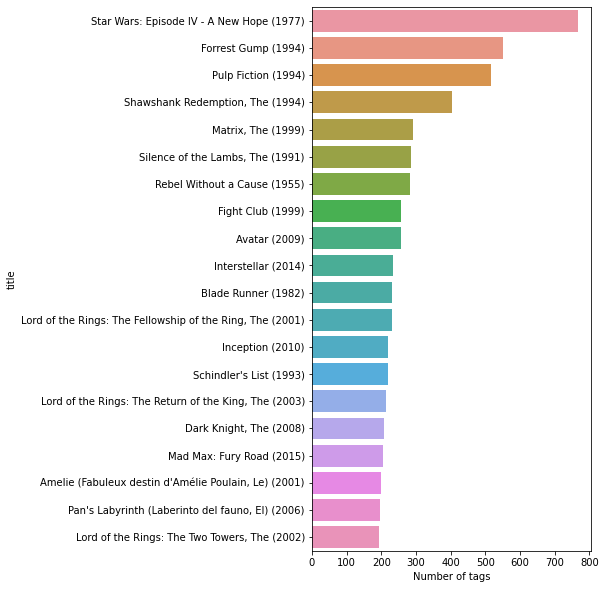

In [21]:
plt.figure(figsize=(5,10))
ax = sns.barplot(x='Number of tags',y='title',data=numberoftags.head(20))
ax.set(xlabel='Number of tags', ylabel='title')
plt.show()

#### checking if there are any null values in the final merged dataset of movies,ratings and tags

In [22]:
dataset_movies_ratings_tags.isnull().any()

movieId    False
title      False
genres     False
rating     False
tag         True
dtype: bool

#### We can see there are null values in "tag" column from above result

#### Replacing null values with "other"

In [23]:
dataset_movies_ratings_tags['tag'] = dataset_movies_ratings_tags['tag'].fillna("Other")
dataset_movies_ratings_tags.isnull().any()

movieId    False
title      False
genres     False
rating     False
tag        False
dtype: bool

In [24]:
len(dataset_movies_ratings_tags.tag == 'other')

480294

In [25]:
finalds_movies_ratings_tags=dataset_movies_ratings_tags[['movieId','rating','tag']]
finalds_movies_ratings_tags.head()

,movieId,rating,tag
0,1,3.893708,Owned
1,1,3.893708,imdb top 250
2,1,3.893708,Pixar
3,1,3.893708,time travel
4,1,3.893708,children


### Label encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
finalds_movies_ratings_tags['tag'] = number.fit_transform(finalds_movies_ratings_tags['tag'].astype('str'))
finalds_movies_ratings_tags.head(5)
finalds_movies_ratings_tags.shape
warnings.filterwarnings('ignore')


/Users/sushmithareddyboddireddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### checking correlation between features

<AxesSubplot:>

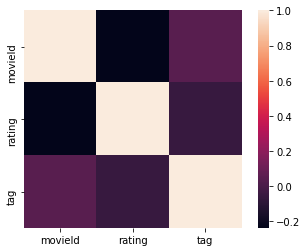

In [27]:
finalds_movies_ratings_tags_temp = finalds_movies_ratings_tags[['movieId','rating','tag']] #Subsetting the data
cor = finalds_movies_ratings_tags_temp.corr()
sns.heatmap(cor, square = True)

#### clustering using K-means

In [28]:
X=finalds_movies_ratings_tags[[ 'rating', 'tag']].values
X

array([[3.89370779e+00, 1.89530000e+04],
       [3.89370779e+00, 4.71610000e+04],
       [3.89370779e+00, 1.99050000e+04],
       ...,
       [4.50000000e+00, 1.88870000e+04],
       [3.00000000e+00, 1.88870000e+04],
       [3.00000000e+00, 1.88870000e+04]])

In [29]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

#### Calculating the best K value using elbow method

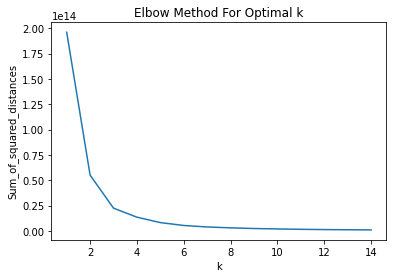

In [30]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Visualizing the clusters

In [31]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

#### considering number of clusters as 5

#### the centroid of cluster is in black color for each cluster

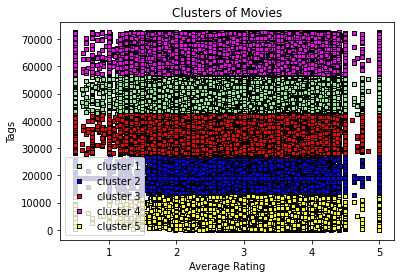

In [32]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=10, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=10, c='blue', marker='s', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=10, c='red', marker='s', edgecolor='black', label='cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=10, c='magenta', marker='s', edgecolor='black', label='cluster 4')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s=10, c='yellow', marker='s', edgecolor='black', label='cluster 5')
plt.title('Clusters of Movies')
plt.xlabel('Average Rating')
plt.ylabel('Tags')
plt.legend()
plt.show()

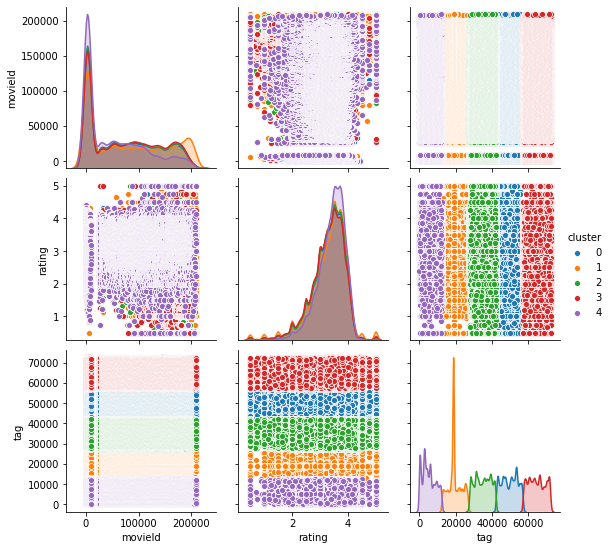

In [33]:
finalds_movies_ratings_tags['cluster'] = y_km
cols = list(finalds_movies_ratings_tags.columns)
sns.pairplot(finalds_movies_ratings_tags[ cols ], hue="cluster")

In [34]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [35]:
row_dict = []
for index, row in dataset_movies_ratings_tags.iterrows():
        row_dict.append(row['title'])

In [36]:
#find the clusters        
clusternames = km.predict(X)
print(clusternames)
clusters = {}
n = 0
for moviename in clusternames:
    if moviename in clusters:
        if(row_dict[n] not in clusters[moviename]):
            clusters[moviename].append(row_dict[n])
    else:
        clusters[moviename] = [row_dict[n]]
    n +=1

[1 0 1 ... 1 1 1]


## Recommending a movie

#### printing the movies in each cluster upto 20

In [37]:
import random
for item in clusters:
    print ("Cluster ", item + 1)
    n = 1
    print(random.sample(clusters[item], 20))

Cluster  2
['Poison Ivy (1985)', 'Ma (2015)', 'Terminator Genisys (2015)', 'Suitor, The (Soupirant, Le) (1962)', 'Life Itself (2014)', 'Ivy (1984)', 'Angel City (1977)', 'Les disparus de Saint-Agil (1938)', 'Tiger Boy (2012)', 'Chaser, The (Chugyeogja) (2008)', 'Guns, Girls, and Gangsters (1959)', "The First Annual 'On Cinema' Oscar Special (2013)", 'Hard Time (1998)', 'Redemption Trail (2013)', 'Copenhagen Dreams (2010)', 'Seed: The Untold Story (2016)', 'It Runs in the Family (2003)', 'Sure Thing, The (1985)', 'A.C.A.B.: All Cops Are Bastards (2012)', "Building the Inferno: Nobuo Nakagawa and the Making of 'Jigoku' (2006)"]
Cluster  1
['Voice of the Whistler (1945)', 'Payday (1973)', 'Truth or Die (2012) ', "Henry Gamble's Birthday Party (2016)", 'Jane Eyre (1944)', 'Words and Pictures (2013)', 'Big Beat (1993)', 'Deadwood: The Movie (2019)', 'Mean Frank and Crazy Tony (1973)', 'Tenchi Forever! (1999)', 'Kumaré (2011)', 'Made in U.S.A. (1966)', 'A Little Lust (2015)', 'For Me and My 

#### There are some overlapping of movies in clusters which we can see from our plot

#### clustering using DBSCAN

Text(0.5, 1.0, 'DBSCAN')

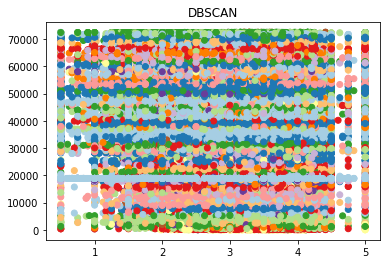

In [38]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=2.3, min_samples=finalds_movies_ratings_tags.shape[1]+1)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

#### We can see overlapping happening even in DBSCAN Clustering. We can recommened a movie from each cluster in DBSCAN like in K-means clustering